# TITANIC - with Keras and Deep Learning

In this project, I will apply with Keras and Deep Learning algorithms to survival datas of the sinking of Titanic. Data is taken from the Kaggle.

### Data Dictionary

* PassengerId: Unique identifier for each passenger.<br>
* Survived: Indicates whether the passenger survived or not - 0 (did not survive) or 1 (survived).<br>
* Pclass: Passenger class. 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class.<br>
* Name: Full name of the passenger.<br>
* Sex: Passenger's gender, "male" or "female".<br>
* Age: Passenger's age.<br>
* SibSp: Number of siblings/spouses the passenger had aboard the ship.<br>
* Parch: Number of parents/children the passenger had aboard the ship.<br>
* Ticket: Passenger's ticket number.<br>
* Fare: Passenger's ticket fare.<br>
* Cabin: Passenger's cabin number.<br>
* Embarked: Port where the passenger embarked the ship, "S" (Southampton), "C" (Cherbourg) or "Q" (Queenstown).

<img src='https://miro.medium.com/v2/resize:fit:1400/1*iOCbIdKMy2I2sUsNBMES5Q.jpeg'>
<br>
<img src='https://i.guim.co.uk/img/media/5edc4d7ab8f12298d1c751e9598492219d8403f3/0_0_915_549/master/915.jpg?width=465&dpr=1&s=none'> <br>
<br>
<a href='https://www.kaggle.com/competitions/titanic' target= _blank> Can get data from this link

### Imports

In [471]:
#pip install tensorflow

In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

### Get Data

In [473]:
df1 = pd.read_csv('ttrain.csv')

In [474]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [475]:
df2 = pd.read_csv('ttest.csv')  

In [476]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [477]:
df = pd.concat([df1, df2], ignore_index=True)

### EDA - Exploratory Data Analysis

In [478]:
df.shape

(1309, 12)

In [479]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [480]:
df.Fare.mean(), df.Fare.max(), df.Fare.min(), df.Fare.median(), df.Fare.std()

(33.29547928134557, 512.3292, 0.0, 14.4542, 51.75866823917414)

In [481]:
df.Fare.value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [482]:
df.Fare.fillna(df.Fare.mean(), inplace=True)

In [483]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

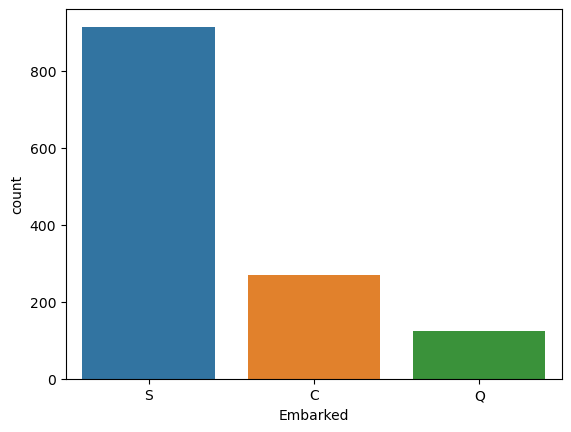

In [484]:
sns.countplot(x=df.Embarked)

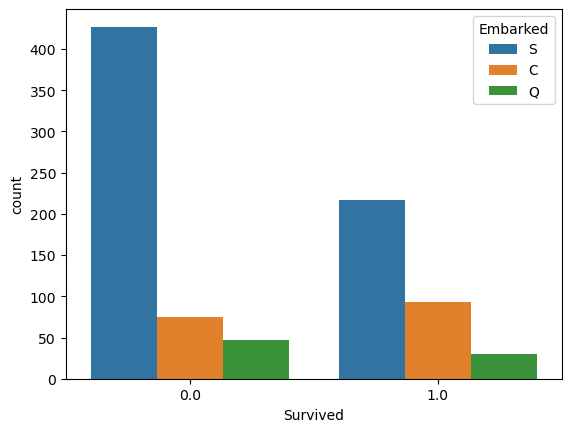

In [485]:
sns.countplot(x= 'Survived', hue = 'Embarked', data=df);

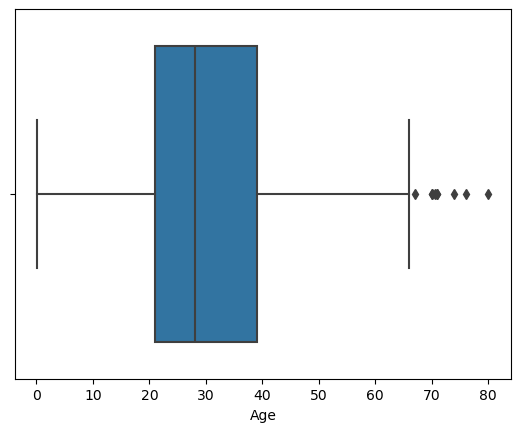

In [486]:
sns.boxplot(x = df["Age"]);

In [487]:
df["Survived"].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [488]:
df.Embarked.fillna('S', inplace=True)

In [489]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [490]:
df.shape

(1309, 12)

In [491]:
df.Cabin.value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [492]:
del df['Cabin']

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [494]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [495]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=True)

In [496]:
df.Title.value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [497]:
df.Title = df.Title.replace(['Ms', 'Mile','Mlle'], 'Miss')

In [498]:
df.Title = df.Title.replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')

In [499]:
df.Title = df.Title.replace(['Dr', 'Major','Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')

In [500]:
df.Title.value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [501]:
df= df.drop(['Name'], axis=1)

In [502]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [503]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [504]:
df.Age.mean()

29.547876241405653

In [505]:
df[ df['Title'] == 'Master' ]['Age'].mean()

5.2881967213114764

In [506]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [507]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.024425,-0.055224,0.008942,0.031416
Survived,-0.005007,1.000000,-0.338481,-0.075808,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.386723,0.060832,0.018322,-0.558477
Age,0.024425,-0.075808,-0.386723,1.000000,-0.216262,-0.132567,0.177429
SibSp,-0.055224,-0.035322,0.060832,-0.216262,1.000000,0.373587,0.160224
Parch,0.008942,0.081629,0.018322,-0.132567,0.373587,1.000000,0.221522
Fare,0.031416,0.257307,-0.558477,0.177429,0.160224,0.221522,1.000000


In [508]:
del df['Ticket']

In [509]:
del df['PassengerId']

In [510]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [511]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [512]:
df = pd.get_dummies(df, drop_first=True)

In [463]:
train  = df[df.Survived.notnull()]
test = df[df.Survived.isnull()].drop('Survived', axis=1)

x = train.drop(['Survived'], axis=1)
y = train[['Survived']]

In [513]:
test.shape

(418, 11)

In [515]:
df2.shape

(418, 11)

In [514]:
x.shape

(891, 11)

### Modelling

In [516]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=.2)

In [517]:
model = Sequential()
model.add(Dense(120,activation= "relu"))
model.add(Dense(80,activation= "relu"))
model.add(Dense(64,activation= "relu"))
model.add(Dense(30,activation= "relu"))
model.add(Dense(20,activation= "relu"))
model.add(Dense(4,activation= "relu"))
model.add(Dense(1,activation= "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [518]:
history = model.fit(x,y,epochs=250, batch_size=32, validation_split=.2, verbose=1)

Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5966 - loss: 0.6485 - val_accuracy: 0.7095 - val_loss: 0.5684
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.6208 - val_accuracy: 0.7151 - val_loss: 0.5839
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6792 - loss: 0.6243 - val_accuracy: 0.7374 - val_loss: 0.5644
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 0.6159 - val_accuracy: 0.7207 - val_loss: 0.5336
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - loss: 0.5962 - val_accuracy: 0.7318 - val_loss: 0.5164
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6915 - loss: 0.5878 - val_accuracy: 0.7318 - val_loss: 0.5099
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6934 - loss: 0.6009 - val_accuracy: 0.7933 - val_loss: 0.5053
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7128 - loss: 0.5774 - val_accuracy: 0.7654 - v

In [519]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 120)            │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 4)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,891 (222.23 KB)

 Trainable params: 18,963 (74.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,928 (148.16 KB)

In [528]:
# Modelin Değerlendirilmesi
loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.9014 - loss: 0.3019


(0.3193112909793854, 0.8882681727409363)

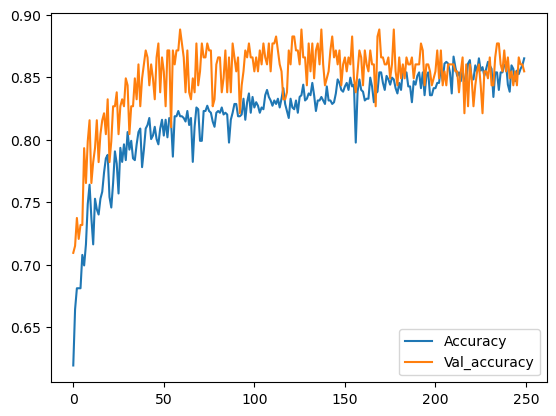

In [520]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val_accuracy")
plt.legend()

In [521]:
pred = model.predict(test).flatten()
pred = (pred > 0.5).astype("int64")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [522]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [524]:
df2.shape

(418, 11)

In [525]:
test.shape

(418, 11)

In [526]:
result = pd.DataFrame({'PassengerId': df2['PassengerId'], 'Survived': pred})
result['Survived'] = result['Survived'].astype('int64')

In [529]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [530]:
result.to_csv('titanic_dl.csv', index=False)